# Data Analysis Project: World Database & Population Analysis

## This notebook analyzes world population, geographic, economic, and human development data through various queries and visualizations.

### Part 1: Setup and Dependencies

### Installing Required Libraries

In [ ]:
# Install required Python packages
%pip install mysql-connector-python beautifulsoup4 requests matplotlib seaborn openpyxl pandas squarify

### Import Libraries

In [3]:
# Import all required libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import mysql.connector
import squarify

## Database Connection

#Connect to the MySQL world database

In [4]:
# Establish database connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="ProfAsem96.",
    database="world"
)

cursor = conn.cursor()

### Explore Database Schema

Inspect the structure of key tables

In [5]:
# Get column names for 'country' table
print("\nColumns in 'country' table:")
query = "SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'country' AND TABLE_SCHEMA = 'world';"
cursor.execute(query)
for row in cursor.fetchall():
    print(f"  - {row[0]}")


Columns in 'country' table:
  - Code
  - Name
  - Continent
  - Region
  - SurfaceArea
  - IndepYear
  - Population
  - LifeExpectancy
  - GNP
  - GNPOld
  - LocalName
  - GovernmentForm
  - HeadOfState
  - Capital
  - Code2


In [6]:
# Get column names for 'countrylanguage' table
print("\nColumns in 'countrylanguage' table:")
query = "SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'countrylanguage' AND TABLE_SCHEMA = 'world';"
cursor.execute(query)
for row in cursor.fetchall():
    print(f"  - {row[0]}")


Columns in 'countrylanguage' table:
  - CountryCode
  - Language
  - IsOfficial
  - Percentage


## Part 2: Basic Data Extraction from Database

### Fetch Countries and Languages

In [7]:
# Fetch all countries from the database
country_query = "SELECT Name FROM country;"
cursor.execute(country_query)
countries = cursor.fetchall()
countries_df = pd.DataFrame(countries, columns=['Country'])

In [8]:
# Fetch all languages from the database
language_query = "SELECT Language FROM countrylanguage;"
cursor.execute(language_query)  
languages = cursor.fetchall()
languages_df = pd.DataFrame(languages, columns=['Language'])

In [9]:
# Example: Filter countries that start with selected letter 
selected_letter = input("Enter a letter to filter countries starting with it: ").strip().upper()
countries_starting_with_selected_letter = countries_df[countries_df['Country'].str.startswith(selected_letter)]
print(f"Countries starting with {selected_letter}: {len(countries_starting_with_selected_letter)} found")

Countries starting with A: 15 found


## Part 3: Population Analysis

### Top and Bottom Countries by Population

In [10]:
# Get top 10 most populated countries
top_countries_query = "SELECT Name, Population FROM country ORDER BY Population DESC LIMIT 10;"
cursor.execute(top_countries_query)
top_countries = cursor.fetchall()
top_countries_df = pd.DataFrame(top_countries, columns=['Country', 'Population'])
top_countries_df.index = pd.RangeIndex(start=1, stop=len(top_countries_df) + 1)

In [11]:
# Get bottom 10 least populated countries (with population > 0)
bottom_countries_query = "SELECT Name, Population FROM country WHERE Population > 0 ORDER BY Population ASC LIMIT 10;"
cursor.execute(bottom_countries_query)
bottom_countries = cursor.fetchall()
bottom_countries_df = pd.DataFrame(bottom_countries, columns=['Country', 'Population'])
bottom_countries_df.index = pd.RangeIndex(start=1, stop=len(bottom_countries_df) + 1)

Bottom 10 Least Populated Cities:


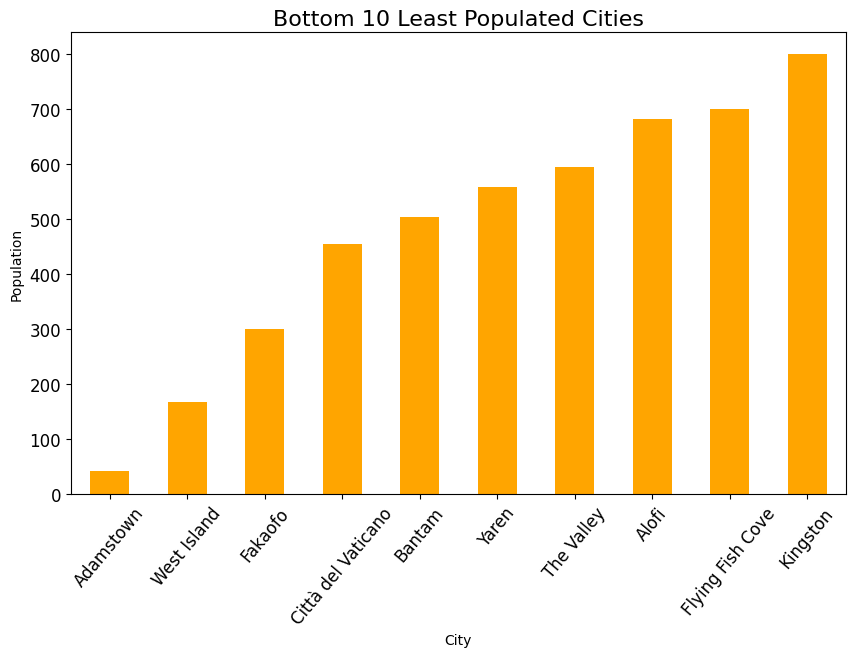

In [12]:
# Get bottom 10 least populated cities (with population > 0)
bottom_cities_query = "SELECT Name, Population FROM city WHERE Population > 0 ORDER BY Population ASC LIMIT 10;"
cursor.execute(bottom_cities_query)
bottom_cities = cursor.fetchall()
bottom_cities_df = pd.DataFrame(bottom_cities, columns=['City', 'Population'])
bottom_cities_df.index = pd.RangeIndex(start=1, stop=len(bottom_cities_df) + 1)

print("Bottom 10 Least Populated Cities:")
bottom_cities_df.plot(kind='bar', x='City', y='Population', legend=False, color='orange', figsize=(10, 6), fontsize=12)
plt.xticks(rotation=50)
plt.xlabel('City')
plt.ylabel('Population')
plt.style.use('classic')
plt.title('Bottom 10 Least Populated Cities', fontdict={'fontsize':16})
plt.show()

Top 10 Most Populated Cities:


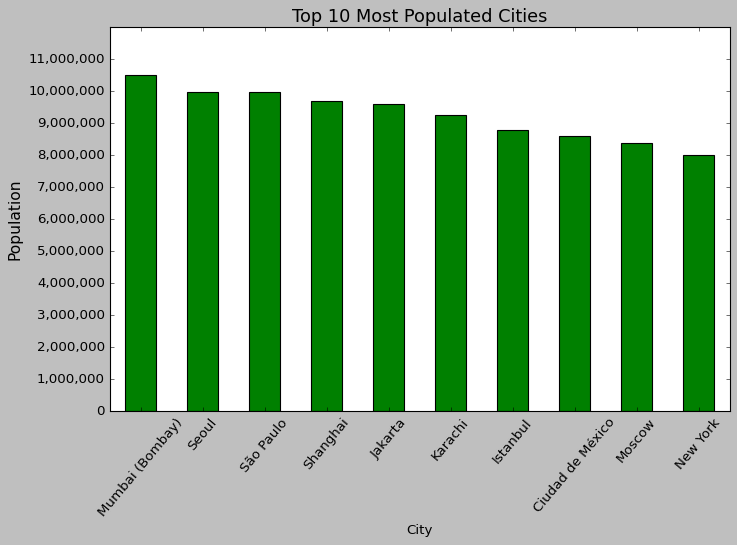

In [13]:
# Get top 10 most populated cities
top_cities_query = "SELECT Name, Population FROM city ORDER BY Population DESC LIMIT 10;"
cursor.execute(top_cities_query)
top_cities = cursor.fetchall()
top_cities_df = pd.DataFrame(top_cities, columns=['City', 'Population'])
top_cities_df.index = pd.RangeIndex(start=1, stop=len(top_cities_df) + 1)

print("Top 10 Most Populated Cities:")
top_cities_df.plot(kind='bar', x='City', y='Population', legend=False, title='Top 10 Most Populated Cities', color='green', figsize=(10, 6), fontsize=12)
plt.xticks(rotation=50)
# ensure linear scale and formatted y-axis (no log scale)
plt.yscale('linear')
yticks = np.arange(0, top_cities_df['Population'].max() + 1000000, 1000000)
plt.yticks(yticks, [f"{int(x):,}" for x in yticks])
plt.xlabel('City')
plt.ylabel('Population',fontdict={'fontsize':14})
plt.title('Top 10 Most Populated Cities', fontdict={'fontsize':16})
plt.style.use('classic')
plt.show()

### Visualizations

Display summary tables

In [14]:
# Display top countries
print("TOP 10 MOST POPULATED COUNTRIES")
print(top_countries_df)
print("\n" + "="*50 + "\n")

# Display bottom countries
print("BOTTOM 10 LEAST POPULATED COUNTRIES")
print(bottom_countries_df)

TOP 10 MOST POPULATED COUNTRIES
               Country  Population
1                China  1277558000
2                India  1013662000
3        United States   278357000
4            Indonesia   212107000
5               Brazil   170115000
6             Pakistan   156483000
7   Russian Federation   146934000
8           Bangladesh   129155000
9                Japan   126714000
10             Nigeria   111506000


BOTTOM 10 LEAST POPULATED COUNTRIES
                          Country  Population
1                        Pitcairn          50
2         Cocos (Keeling) Islands         600
3   Holy See (Vatican City State)        1000
4                Falkland Islands        2000
5                         Tokelau        2000
6                            Niue        2000
7                  Norfolk Island        2000
8                Christmas Island        2500
9          Svalbard and Jan Mayen        3200
10                   Saint Helena        6000


## Part 4: City and Population Percentage Analysis

### Cities within a Selected Country

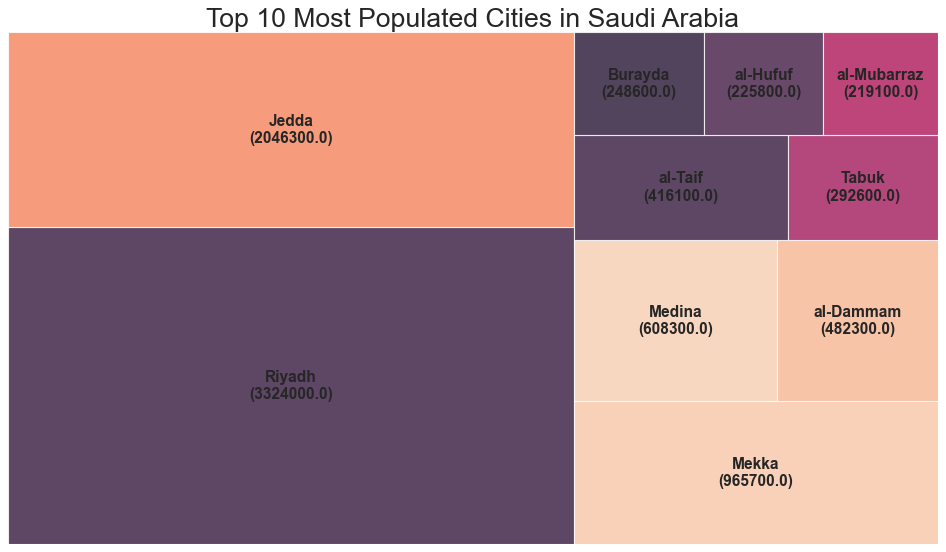

In [15]:


# Fetch top 10 cities for a selected country
selected_country = input("Enter a country name to see its top cities: ")
country_cities_query = f"""
SELECT Name, Population 
FROM city 
WHERE CountryCode = (SELECT Code FROM country WHERE Name = '{selected_country}') 
ORDER BY Population DESC 
LIMIT 10;
"""
cursor.execute(country_cities_query)
country_cities = cursor.fetchall()
country_cities_df = pd.DataFrame(country_cities, columns=['City', 'Population'])
country_cities_df.index = pd.RangeIndex(start=1, stop=len(country_cities_df) + 1)

sns.set_style("whitegrid")

# Guard against empty results and ensure numeric sizes for squarify
if country_cities_df.empty:
	print(f"No city data found for '{selected_country}'.")
else:
	plt.figure(figsize=(15, 8))
	sizes = country_cities_df['Population'].astype(float).clip(lower=1)  # avoid zeros
	labels = country_cities_df['City'].astype(str)
	new_labels = [f"{label}\n({value})" for label, value in zip(labels, sizes)]
	squarify.plot(sizes=sizes, label=new_labels , alpha=0.8,text_kwargs={'fontsize':14,'weight':'bold'})
	plt.title(f'Top 10 Most Populated Cities in {selected_country}', fontdict={'fontsize':24})
	plt.axis('off')
	plt.show()

### Population Distribution within a Country

Calculate percentage of largest cities compared to total country population


Top 5 Cities Population Percentage in Turkey:
       City Population Percentage (%)
1  Istanbul                   31.0232
2    Ankara                   10.7253
3     Izmir                    7.5206
4     Adana                    3.9934
5     Bursa                    3.8685


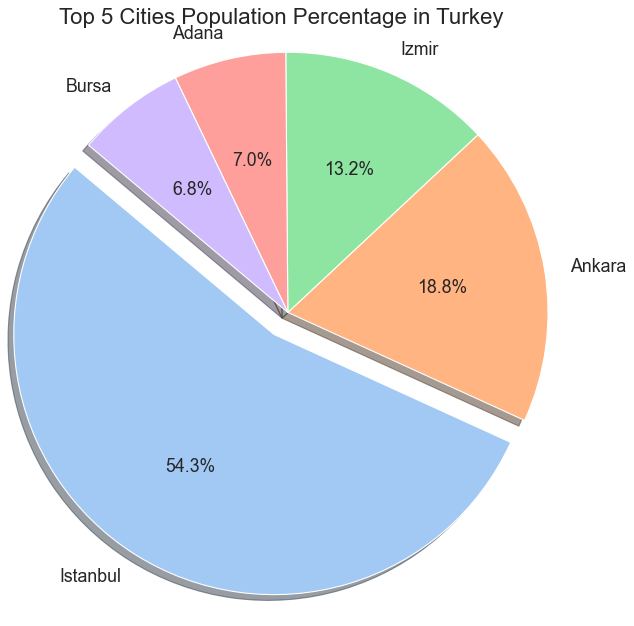

In [86]:
# Calculate percentage of population in top cities
selected_country_1 = input("Enter a country name to see population distribution: ")
country_population_percentage_query = f"""
SELECT 
    Name,
    (Population / (
        SELECT SUM(Population) 
        FROM city 
        WHERE CountryCode = (SELECT Code FROM country WHERE Name = '{selected_country_1}')
    ) * 100) AS Population_Percentage 
FROM city 
WHERE CountryCode = (SELECT Code FROM country WHERE Name = '{selected_country_1}') 
ORDER BY Population DESC 
LIMIT 5;
"""
cursor.execute(country_population_percentage_query)
country_population_percentage = cursor.fetchall()
country_population_percentage_df = pd.DataFrame(
    country_population_percentage, 
    columns=['City', 'Population Percentage (%)']
)
country_population_percentage_df.index = pd.RangeIndex(
    start=1, 
    stop=len(country_population_percentage_df) + 1
)

print(f"\nTop 5 Cities Population Percentage in {selected_country_1}:")
print(country_population_percentage_df)

if country_population_percentage_df.empty:
    print("No city data to plot.")
else:
    plt.figure(figsize=(8, 8))
    vals = country_population_percentage_df['Population Percentage (%)'].astype(float)
    labels = country_population_percentage_df['City']
    # explode the largest slice for emphasis
    explode = [0.1] + [0]*(len(vals)-1) if len(vals) > 0 else None
    plt.pie(vals, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True, textprops={'fontsize':16},colors=sns.color_palette('pastel')[0:len(vals)])
    plt.title(f"Top {len(vals)} Cities Population Percentage in {selected_country_1}",fontdict={'fontsize':20})
    plt.axis('equal')  # ensure pie is a circle
    plt.tight_layout()
    plt.show()

## Part 5: Language Analysis

### Languages by Country Frequency

In [16]:
# Get count of countries speaking each language (top 20)
language_country_counts_query = """
SELECT Language, COUNT(CountryCode) AS Country_Count 
FROM countrylanguage 
GROUP BY Language 
ORDER BY Country_Count DESC;
"""
cursor.execute(language_country_counts_query)
language_country_counts = cursor.fetchall()
language_country_counts_df = pd.DataFrame(
    language_country_counts, 
    columns=['Language', 'Number of Countries']
)
language_country_counts_df.index = pd.RangeIndex(
    start=1, 
    stop=len(language_country_counts_df) + 1
)

print("Top 20 Languages by Number of Countries:")
print(language_country_counts_df.head(20))

Top 20 Languages by Number of Countries:
          Language  Number of Countries
1          English                   60
2           Arabic                   33
3          Spanish                   28
4           French                   25
5           German                   19
6          Chinese                   19
7          Russian                   17
8          Italian                   15
9   Creole English                   14
10      Portuguese                   12
11         Turkish                   12
12             Ful                   12
13       Ukrainian                   12
14          Polish                   10
15  Serbo-Croatian                    9
16   Creole French                    9
17           Hindi                    8
18       Hungarian                    8
19          Romani                    8
20     Belorussian                    7


<Figure size 960x640 with 0 Axes>

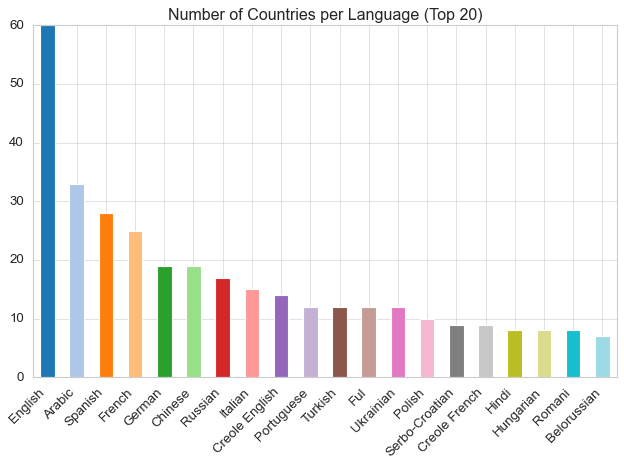

In [91]:
# Use a bar plot for categorical language counts (pandas plotting doesn't support 'hue')
plt.figure(figsize=(12, 8))
ax = language_country_counts_df.head(20).plot(
	kind='bar',
	x='Language',
	y='Number of Countries',
	legend=False,
	fontsize=12,
	color=sns.color_palette('tab20', n_colors=min(20, len(language_country_counts_df.head(20))))
)
ax.set_xlabel('')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Countries per Language (Top 20)')
plt.tight_layout()
plt.show()

### Languages by Continent

In [17]:
# Get languages by continent
language_continents_query = """
SELECT cl.Language, cl.IsOfficial, c.Continent 
FROM countrylanguage cl 
JOIN country c ON cl.CountryCode = c.Code;
"""
cursor.execute(language_continents_query)
language_continents = cursor.fetchall()
language_continents_df = pd.DataFrame(
    language_continents, 
    columns=['Language', 'IsOfficial', 'Continent']
)

# Remove duplicates and sort
language_continents_df.sort_values(by='Continent', inplace=True)
language_continents_df.drop_duplicates(inplace=True)

print("Languages by Continent (sample):")
print(language_continents_df.head(20))

Languages by Continent (sample):
                Language IsOfficial Continent
491                Grebo          F    Africa
588                Makua          F    Africa
587                Lomwe          F    Africa
586               Chuabo          F    Africa
563             Tamashek          F    Africa
562              Soninke          F    Africa
561              Songhai          F    Africa
560  Senufo and Minianka          F    Africa
559                  Ful          F    Africa
558              Bambara          F    Africa
542             Malagasy          T    Africa
541               French          T    Africa
531              Berberi          F    Africa
530               Arabic          T    Africa
509                 Zulu          F    Africa
508                Sotho          T    Africa
507              English          T    Africa
496                 Mano          F    Africa
495              Malinke          F    Africa
494                 Loma          F    Africa


## Part 6: Health and Development Indicators

### Life Expectancy by Continent

In [18]:
# Calculate average life expectancy by continent
continent_avg_lifeExp_query = """
SELECT Continent, AVG(LifeExpectancy) AS Avg_Life_Expectancy 
FROM country 
GROUP BY Continent;
"""
cursor.execute(continent_avg_lifeExp_query)
continent_avg_lifeExp_data = cursor.fetchall()
continent_avg_lifeExp_df = pd.DataFrame(
    continent_avg_lifeExp_data, 
    columns=['Continent', 'Average Life Expectancy (years)']
)
continent_avg_lifeExp_df.index = pd.RangeIndex(
    start=1, 
    stop=len(continent_avg_lifeExp_df) + 1
)

print("Average Life Expectancy by Continent:")
print(continent_avg_lifeExp_df)

Average Life Expectancy by Continent:
       Continent Average Life Expectancy (years)
1  North America                        72.99189
2           Asia                        67.44118
3         Africa                        52.57193
4         Europe                        75.14773
5  South America                        70.94615
6        Oceania                        69.71500
7     Antarctica                            None


### Correlation Analysis: Population, Life Expectancy, GNP, and Area

In [19]:
# Fetch correlation data from database
corr_data_query = """
SELECT Population, LifeExpectancy, GNP, SurfaceArea  
FROM country 
WHERE Population > 0 AND LifeExpectancy IS NOT NULL;
"""
cursor.execute(corr_data_query)
corr_data = cursor.fetchall()
corr_data_df = pd.DataFrame(
    corr_data, 
    columns=['Population', 'LifeExpectancy', 'GNP', 'Area']
)
corr_data_df.index = pd.RangeIndex(start=1, stop=len(corr_data_df) + 1)

print("Sample of Correlation Data:")
print(corr_data_df.head(10))

Sample of Correlation Data:
    Population LifeExpectancy        GNP        Area
1       103000           78.4     828.00      193.00
2     22720000           45.9    5976.00   652090.00
3     12878000           38.3    6648.00  1246700.00
4         8000           76.1      63.20       96.00
5      3401200           71.6    3205.00    28748.00
6        78000           83.5    1630.00      468.00
7       217000           74.7    1941.00      800.00
8      2441000           74.1   37966.00    83600.00
9     37032000           75.1  340238.00  2780400.00
10     3520000           66.4    1813.00    29800.00


In [ ]:
# Calculate and display correlation matrix
corr_data_df.corr()

,Population,LifeExpectancy,GNP,Area
Population,1.000000,0.006774,0.278737,0.471988
LifeExpectancy,0.006774,1.000000,0.164094,0.001671
GNP,0.278737,0.164094,1.000000,0.383816
Area,0.471988,0.001671,0.383816,1.000000


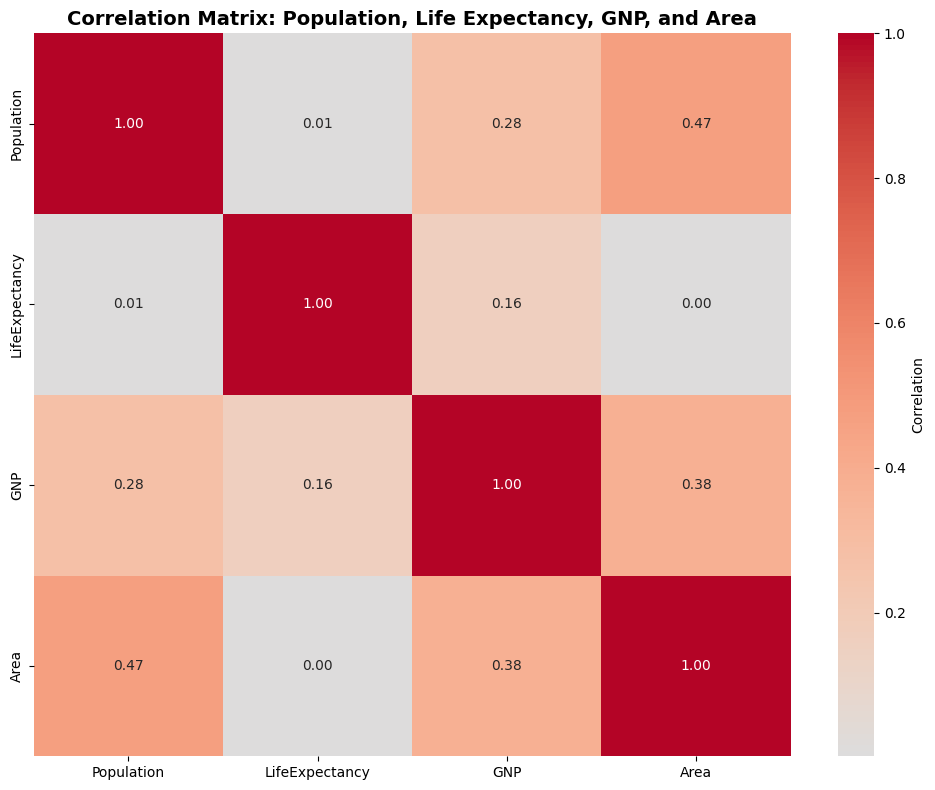

In [21]:

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_data_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix: Population, Life Expectancy, GNP, and Area', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Part 8: External Data Integration

### World Population Growth (World Bank Data)

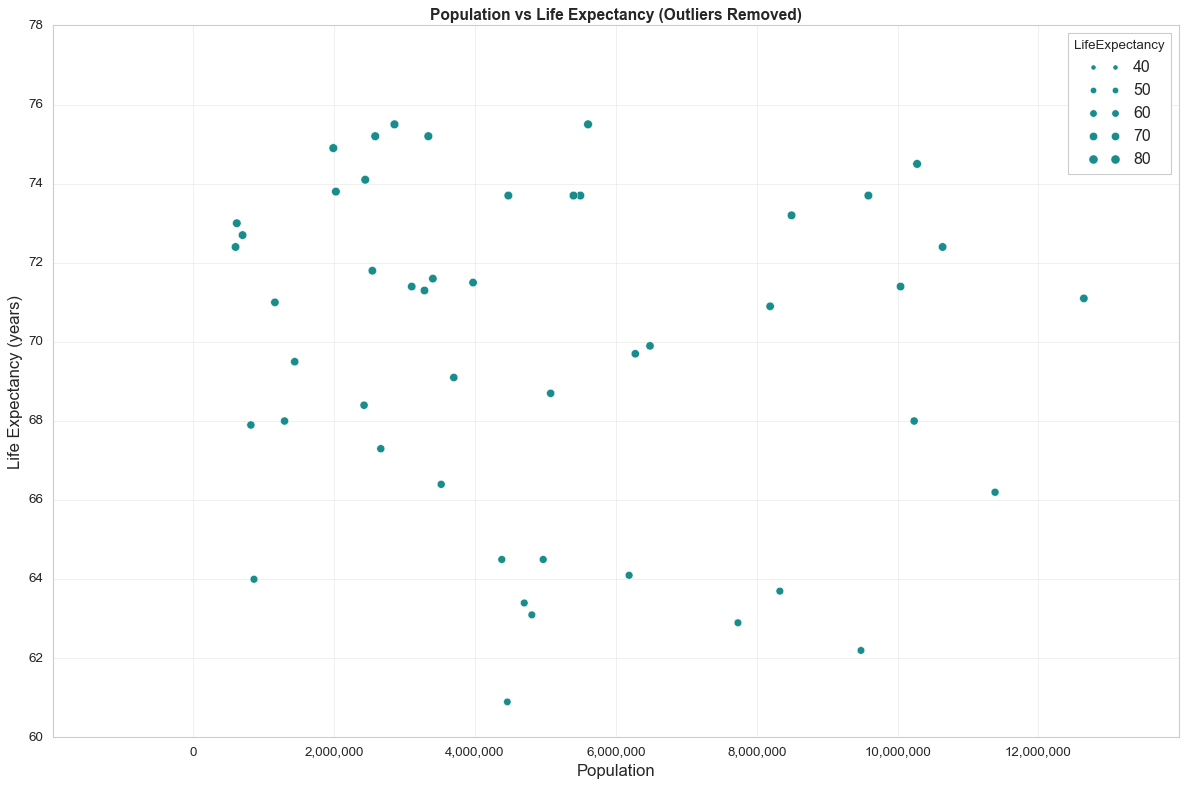

In [104]:
# Prepare data for visualization (remove outliers using IQR method)
relation_population_lifeExp = corr_data_df[['Population', 'LifeExpectancy']].astype(float)

# Calculate quartiles
q1 = relation_population_lifeExp.quantile(0.25)
q3 = relation_population_lifeExp.quantile(0.75)

# Filter outliers
relation_population_lifeExp_filtered = relation_population_lifeExp[
    (relation_population_lifeExp >= q1) & (relation_population_lifeExp <= q3)
].dropna()

# Create scatter plot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=relation_population_lifeExp_filtered, x='Population', y='LifeExpectancy', alpha=0.9,size=relation_population_lifeExp['LifeExpectancy'], color='teal', edgecolor='w', linewidth=0.5)
plt.title('Population vs Life Expectancy (Outliers Removed)', fontsize=14, fontweight='bold')
plt.xscale('linear')
plt.xticks(np.arange(0, relation_population_lifeExp_filtered['Population'].max()+1000000, 2000000),
           [f"{int(x):,}" for x in np.arange(0, relation_population_lifeExp_filtered['Population'].max()+1000000, 2000000)])
plt.xlabel('Population', fontsize=15)
plt.ylabel('Life Expectancy (years)', fontsize=15)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

### GDP by Country (Web-scraped)

This section scrapes the GDP (nominal) figures from WorldPopulationReview (`https://worldpopulationreview.com/countries/by-gdp`) and builds `gdp_df`.

- The scraping code attempts to parse an HTML `<table>` and has fallbacks for alternative structures.
- After scraping, the notebook cleans the `GDP (Nominal)` column (removes non-numeric characters and converts to numeric) and creates a formatted `GDP (USD)` column for display.
- If scraping fails, the cell prints an error message. If you'd like, I can also save `gdp_df` to `gdp_by_country.csv` so you don't need to re-scrape.

(Next cell performs the scraping and displays exact GDP values.)

In [153]:
# Scrape GDP by country from WorldPopulationReview and build `gdp_df`
# Note: Requires internet access. This cell recreates `gdp_df` used later in the notebook.
url = "https://worldpopulationreview.com/countries/by-gdp"
try:
    resp = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}, timeout=15)
    resp.raise_for_status()
    soup = BeautifulSoup(resp.content, 'html.parser')

    # Try to find a table; fall back to rows if structured differently
    table = soup.find('table')
    gdp_data = []
    if table:
        rows = table.find_all('tr')
        # Extract header if present
        header_cells = table.find_all('th')
        if header_cells:
            headers = [th.get_text(strip=True) for th in header_cells]
        else:
            headers = ['Rank', 'Country', 'GDP (Nominal)', 'Yearly Change', 'World Percentage', 'Continent']

        for row in rows[1:]:  # skip header
            cols = row.find_all(['td', 'th'])
            cols = [c.get_text(strip=True) for c in cols]
            if cols:
                gdp_data.append(cols)
    else:
        # If no <table> found, attempt to find table-like div rows (best-effort)
        rows = soup.select('div.table__row, div.wp-block-table tr')
        headers = ['Rank', 'Country', 'GDP (Nominal)', 'Yearly Change', 'World Percentage', 'Continent']
        for r in rows:
            cols = [c.get_text(strip=True) for c in r.find_all(['div','td','span'])]
            if len(cols) >= 3:
                gdp_data.append(cols[:6])

    if not gdp_data:
        print("No GDP table found or parsing returned no rows. Please check the URL structure or run this cell again.")
    else:
        # Build DataFrame; handle mismatched column counts by trimming/padding
        max_cols = max(len(row) for row in gdp_data)
        if len(headers) != max_cols:
            # adjust headers if needed
            headers = headers[:max_cols] + [f'col_{i}' for i in range(len(headers), max_cols)]

        gdp_df = pd.DataFrame([row[:max_cols] + [None]*(max_cols - len(row)) for row in gdp_data], columns=headers)
        gdp_df.index = pd.RangeIndex(start=1, stop=len(gdp_df) + 1)

        # Normalize Rank (if present) and clean up numeric columns
        if 'Rank' in gdp_df.columns:
            gdp_df['Rank'] = gdp_df['Rank'].astype(str).str.replace(r"[^0-9]", "", regex=True)
            gdp_df['Rank'] = pd.to_numeric(gdp_df['Rank'], errors='coerce')

        if 'GDP (Nominal)' in gdp_df.columns:
            # Remove currency symbols, commas and any non-numeric chars and convert to numeric
            gdp_df['GDP (Nominal)'] = gdp_df['GDP (Nominal)'].astype(str).str.replace(r"[^0-9.-]", "", regex=True)
            gdp_df['GDP (Nominal)'] = pd.to_numeric(gdp_df['GDP (Nominal)'], errors='coerce')

            # Create a human-readable formatted column with exact GDP in USD
            def format_usd(x):
                try:
                    if pd.isna(x):
                        return None
                    # Keep as integer if close to int, else keep as float with no decimals
                    return f"${int(round(x)):,}"
                except Exception:
                    return None

            gdp_df['GDP (USD)'] = gdp_df['GDP (Nominal)'].apply(format_usd)

        # Choose display columns: prefer showing Country + exact GDP
        display_cols = [c for c in ['Rank', 'Country', 'GDP (Nominal)', 'GDP (USD)'] if c in gdp_df.columns]

        print("GDP Data (top 20 with exact GDP values):")
        display(gdp_df.head(20))

        # Optional: persist to CSV for reuse (uncomment if desired)
        # gdp_df.to_csv('gdp_by_country.csv', index=False)

except requests.RequestException as e:
    print(f"Error fetching GDP page: {e}")
except Exception as e:
    print(f"Unexpected error while parsing GDP data: {e}")

GDP Data (top 20 with exact GDP values):


,,Country,Rank,GDP (IMF '25),GDP (UN '23),GDP Per Capita,Population
1,,United States,1,$30.51 Tn,$27.72 Tn,"$87,847","347,276,000"
2,,China,2,$19.23 Tn,$17.79 Tn,"$13,581","1,416,100,000"
3,,Germany,3,$4.74 Tn,$4.53 Tn,"$56,435","84,075,100"
4,,India,4,$4.19 Tn,$3.58 Tn,"$2,860","1,463,870,000"
5,,Japan,5,$4.19 Tn,$4.20 Tn,"$34,008","123,103,000"
6,,United Kingdom,6,$3.84 Tn,$3.38 Tn,"$55,199","69,551,300"
7,,France,7,$3.21 Tn,$3.05 Tn,"$48,181","66,650,800"
8,,Italy,8,$2.42 Tn,$2.30 Tn,"$40,964","59,146,300"
9,,Canada,9,$2.23 Tn,$2.14 Tn,"$55,458","40,126,700"
10,,Brazil,10,$2.13 Tn,$2.19 Tn,"$9,990","212,812,000"


In [ ]:
# Clean and convert GDP (IMF '25) column - remove '$' and convert to float
gdp_df['GDP (IMF \'25)'] = gdp_df['GDP (IMF \'25)'].str.slice(1).str.replace(',','').astype(float)
gdp_df['GDP Per Capita'] = gdp_df['GDP Per Capita'].str.slice(1,).str.replace(',','').astype(float)

In [155]:
# Display GDP DataFrame summary statistics
gdp_df[["GDP (IMF '25)", "GDP Per Capita"]].describe()

,GDP (IMF '25),GDP Per Capita
count,211.000000,211.000000
mean,123.819573,21949.545024
std,200.994381,32790.148172
min,0.000000,328.000000
25%,3.315000,2874.000000
50%,27.060000,8538.000000
75%,124.050000,29514.000000
max,979.900000,260696.000000


GDP (IMF '25)        Axes(0.125,0.1;0.352273x0.8)
GDP Per Capita    Axes(0.547727,0.1;0.352273x0.8)
dtype: object

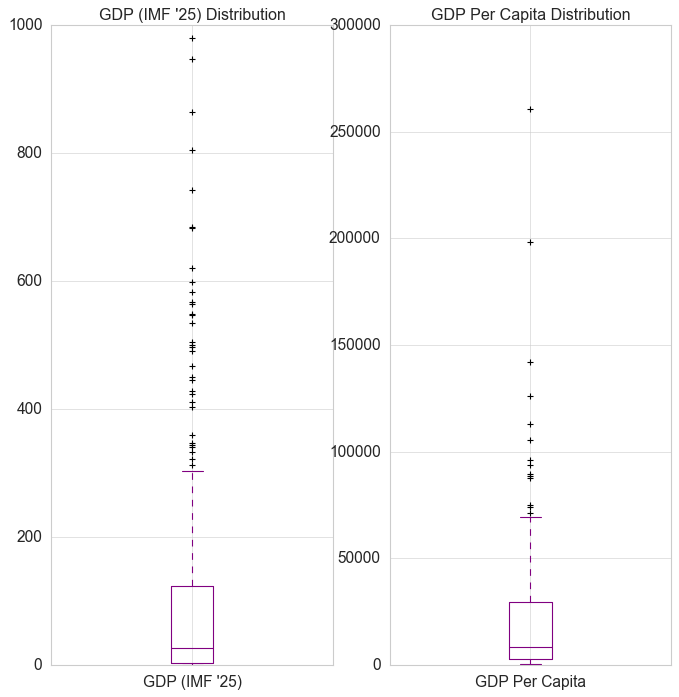

In [ ]:
# Plot boxplots for GDP (IMF '25) and GDP Per Capita to inspect distributions and outliers.
# - kind='box' creates boxplots
# - subplots=True creates a separate subplot for each column
# - layout=(1, 2) arranges subplots in 1 row and 2 columns
# - figsize sets the overall figure size
# - fontsize controls tick/label sizes
# - color sets the box color
# - title provides a title for each subplot
cols = ["GDP (IMF '25)", "GDP Per Capita"]
if not all(c in gdp_df.columns for c in cols):
    missing = [c for c in cols if c not in gdp_df.columns]
    print(f"Cannot plot boxplots — missing columns: {missing}")
else:
    gdp_df[cols].plot(
        kind='box',
        figsize=(10, 10),
        subplots=True,
        layout=(1, 2),
        fontsize=14,
        color='purple',
        title=["GDP (IMF '25) Distribution", "GDP Per Capita Distribution"]
    )
    # Add a common suptitle and adjust layout so titles/labels don't overlap
    plt.suptitle("Distribution of GDP (IMF '25) and GDP Per Capita", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [24]:
# Load World Bank population growth data
# Note: World Bank CSV files typically have metadata rows at the beginning
try:
    Yearly_Growth = pd.read_csv(
        'API_SP.POP.GROW_DS2_en_csv_v2_253269.csv', 
        skiprows=4, 
        low_memory=False
    )
except pd.errors.ParserError:
    # Fallback to Python engine if C engine fails
    Yearly_Growth = pd.read_csv(
        'API_SP.POP.GROW_DS2_en_csv_v2_253269.csv', 
        skiprows=4, 
        engine='python'
    )

# Extract relevant columns and rename
Yearly_Growth = Yearly_Growth[['Country Name', '2024']].rename(
    columns={'Country Name': 'Country', '2024': 'Yearly Growth Rate (%)'}
)

print("World Population Growth Rate (2024):")
print(Yearly_Growth.head(15))

World Population Growth Rate (2024):
                        Country  Yearly Growth Rate (%)
0                         Aruba                0.246531
1   Africa Eastern and Southern                2.472935
2                   Afghanistan                2.836573
3    Africa Western and Central                2.398473
4                        Angola                3.044200
5                       Albania               -1.148424
6                       Andorra                1.329307
7                    Arab World                2.149254
8          United Arab Emirates                3.682219
9                     Argentina                0.345830
10                      Armenia                2.307615
11               American Samoa               -1.603666
12          Antigua and Barbuda                0.487472
13                    Australia                2.050041
14                      Austria                0.510327


### Human Development Index (HDI) Analysis

In [25]:
# Load HDI data from Excel file
# Note: This file must be present in the workspace
try:
    HDI_data = pd.read_excel(
        'HDR25_Statistical_Annex_HDI_Table.xlsx', 
        engine='openpyxl',
        skiprows=7
    )
    
    # Extract relevant columns
    HDI_data = HDI_data.iloc[0:200, 1:11].drop(
        columns=['Unnamed: 3','Unnamed: 5','Unnamed: 7','Unnamed: 9']
    )
    
    # Rename columns for clarity
    HDI_data = HDI_data.rename(columns={
        'Very high human development': 'Country',
        'Unnamed: 2': 'HDI Rank',
        'Unnamed: 4': 'Life Expectancy At Birth',
        'Unnamed: 6': 'Expected Years Of Schooling',
        'Unnamed: 8': 'Mean Years Of Schooling',
        'Unnamed: 10': 'GNI per Capita'
    })
    
    # Remove rows with missing values
    HDI_data = HDI_data.dropna()
    
    print("HDI Data Summary:")
    print(HDI_data.head(10))
    print(f"\nTotal countries: {len(HDI_data)}")
    
except FileNotFoundError:
    print("Error: HDR25_Statistical_Annex_HDI_Table.xlsx file not found")
    print("Please ensure the file is in the workspace directory")

HDI Data Summary:
                  Country HDI Rank  Life Expectancy At Birth  \
0                 Iceland    0.972                    82.691   
1                  Norway     0.97                    83.308   
2             Switzerland     0.97                    83.954   
3                 Denmark    0.962                    81.933   
4                 Germany    0.959                    81.378   
5                  Sweden    0.959                    83.262   
6               Australia    0.958                    83.923   
7  Hong Kong, China (SAR)    0.955                    85.511   
8             Netherlands    0.955                    82.158   
9                 Belgium    0.951                    82.115   

   Expected Years Of Schooling Mean Years Of Schooling GNI per Capita  
0                    18.850590               13.908926    69116.93736  
1                    18.792850               13.117962    112710.0211  
2                    16.667530               13.949121    819

In [26]:
# Data Quality Check
print("HDI Data Quality Report:")
print("="*50)
print(HDI_data.describe())
print("\nMissing Values:")
print(HDI_data.isnull().sum())

HDI Data Quality Report:
       Life Expectancy At Birth  Expected Years Of Schooling
count                195.000000                   195.000000
mean                  73.182246                    13.619220
std                    7.192196                     3.114610
min                   54.462000                     5.634770
25%                   67.517000                    11.507390
50%                   73.566000                    13.335777
75%                   78.460500                    15.896250
max                   86.372000                    21.687241

Missing Values:
Country                        0
HDI Rank                       0
Life Expectancy At Birth       0
Expected Years Of Schooling    0
Mean Years Of Schooling        0
GNI per Capita                 0
dtype: int64


In [27]:
# Data Cleaning: Handle missing values with '..' or NaN
HDI_data = HDI_data.replace('..', np.nan)

# Fill missing values with statistical measures
if 'HDI Rank' in HDI_data.columns and HDI_data['HDI Rank'].isnull().any():
    # For last two rows, fill with min, quantile, etc.
    HDI_data.iloc[-2, HDI_data.columns.get_loc('HDI Rank')] = HDI_data['HDI Rank'].min()
    HDI_data.iloc[-1, HDI_data.columns.get_loc('HDI Rank')] = HDI_data['HDI Rank'].quantile(0.75)

if 'Mean Years Of Schooling' in HDI_data.columns and HDI_data['Mean Years Of Schooling'].isnull().any():
    HDI_data.iloc[-2, HDI_data.columns.get_loc('Mean Years Of Schooling')] = HDI_data['Mean Years Of Schooling'].mean()
    HDI_data.iloc[-1, HDI_data.columns.get_loc('Mean Years Of Schooling')] = HDI_data['Mean Years Of Schooling'].median()

if 'GNI per Capita' in HDI_data.columns and HDI_data['GNI per Capita'].isnull().any():
    HDI_data.iloc[-2, HDI_data.columns.get_loc('GNI per Capita')] = HDI_data['GNI per Capita'].quantile(0.25)
    HDI_data.iloc[-1, HDI_data.columns.get_loc('GNI per Capita')] = HDI_data['GNI per Capita'].quantile(0.75)

print("Data after cleaning:")
print(HDI_data.head(10))

Data after cleaning:
                  Country  HDI Rank  Life Expectancy At Birth  \
0                 Iceland     0.972                    82.691   
1                  Norway     0.970                    83.308   
2             Switzerland     0.970                    83.954   
3                 Denmark     0.962                    81.933   
4                 Germany     0.959                    81.378   
5                  Sweden     0.959                    83.262   
6               Australia     0.958                    83.923   
7  Hong Kong, China (SAR)     0.955                    85.511   
8             Netherlands     0.955                    82.158   
9                 Belgium     0.951                    82.115   

   Expected Years Of Schooling  Mean Years Of Schooling  GNI per Capita  
0                    18.850590                13.908926     69116.93736  
1                    18.792850                13.117962    112710.02110  
2                    16.667530           

C:\Users\asemh\AppData\Local\Temp\ipykernel_15312\2268366806.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  HDI_data = HDI_data.replace('..', np.nan)


## Part 9: Summary and Insights

### Key Findings

This analysis covered:
- Population distribution across countries and cities
- Language diversity by continent
- Health indicators (life expectancy)
- Human development metrics
- Economic indicators (GNP)
- Correlation analysis between development factors
- GDP data from external sources

### Notes for Future Work
- Expand analysis with time-series data
- Perform advanced statistical tests

In [163]:
# Close database connection
cursor.close()
conn.close()
print("Database connection closed successfully")

Database connection closed successfully
